In [5]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Split the dataset into training, validation, and test sets
X_train, X_valid = X_train_full[:-5000] / 255.0, X_train_full[-5000:] / 255.0
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test / 255.0

# Define class names for the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Calculate the mean and standard deviation of the pixel values in the training set
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

# Standardize the training, validation, and test sets using the mean and standard deviation of the training set
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds


In [6]:
# Define a function to build the neural network model
def build_model(seed=42):
    # Set the random seed for reproducibility
    tf.random.set_seed(seed)

    # Create a Sequential model
    return tf.keras.Sequential([
        # Flatten layer to convert input images into 1D arrays
        tf.keras.layers.Flatten(input_shape=[28, 28]),

        # Dense layers with ReLU activation
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),

        # Output layer with softmax activation for multiclass classification
        tf.keras.layers.Dense(10, activation="softmax")
    ])

# Define a function to build, compile, and train the model
def build_and_train_model(optimizer):
    # Build the model
    model = build_model()

    # Compile the model with sparse categorical cross-entropy loss and the specified optimizer
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])

    # Train the model with training and validation data
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

# Define the optimizer (Stochastic Gradient Descent with momentum)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Build, compile, and train the model with the specified optimizer
history_sgd = build_and_train_model(optimizer)  # Store the training history


Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7074 - accuracy: 0.7581 - val_loss: 0.5093 - val_accuracy: 0.8172
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4761 - accuracy: 0.8333 - val_loss: 0.4506 - val_accuracy: 0.8316
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4306 - accuracy: 0.8482 - val_loss: 0.4150 - val_accuracy: 0.8490
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4022 - accuracy: 0.8593 - val_loss: 0.3898 - val_accuracy: 0.8602
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3801 - accuracy: 0.8653 - val_loss: 0.3721 - val_accuracy: 0.8670
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3660 - accuracy: 0.8700 - val_loss: 0.3687 - val_accuracy: 0.8684
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3487 - accuracy: 0.8746 - val_loss: 0.3703 - val_accuracy:

**Momentum optimization**

 Momentum is a technique that helps accelerate SGD by adding a fraction of the previous update to the current update, which smooths out the gradient descent trajectory and speeds up convergence

In [7]:
# Define the optimizer with Stochastic Gradient Descent (SGD) and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Train the model using the defined optimizer with momentum
history_momentum = build_and_train_model(optimizer)  # Store the training history


Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6658 - accuracy: 0.7715 - val_loss: 0.5077 - val_accuracy: 0.8146
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4662 - accuracy: 0.8343 - val_loss: 0.4491 - val_accuracy: 0.8394
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4216 - accuracy: 0.8503 - val_loss: 0.4184 - val_accuracy: 0.8510
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3929 - accuracy: 0.8603 - val_loss: 0.3865 - val_accuracy: 0.8610
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3711 - accuracy: 0.8669 - val_loss: 0.3670 - val_accuracy: 0.8656
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3576 - accuracy: 0.8713 - val_loss: 0.3725 - val_accuracy: 0.8674
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3412 - accuracy: 0.8764 - val_loss: 0.3647 - val_accuracy:

**Nesterov Accelerated Gradient**

Nesterov Accelerated Gradient (NAG) is a modification of the classic momentum optimization technique. While standard momentum updates the weights based on the current gradient, NAG updates the weights based on an estimated future gradient. It achieves this by first applying the momentum term to the current position, then adjusting the gradient term using the momentum to look ahead and make a more accurate estimate of the gradient at that future position.

In [8]:
# Define the optimizer with SGD, momentum, and Nesterov acceleration
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# Train the model using the defined optimizer with Nesterov acceleration
history_nesterov = build_and_train_model(optimizer)  # Store the training history


Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6724 - accuracy: 0.7729 - val_loss: 0.4915 - val_accuracy: 0.8232
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4572 - accuracy: 0.8403 - val_loss: 0.4398 - val_accuracy: 0.8406
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4156 - accuracy: 0.8537 - val_loss: 0.4013 - val_accuracy: 0.8552
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3912 - accuracy: 0.8632 - val_loss: 0.3840 - val_accuracy: 0.8596
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3718 - accuracy: 0.8684 - val_loss: 0.3691 - val_accuracy: 0.8630
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3574 - accuracy: 0.8736 - val_loss: 0.3812 - val_accuracy: 0.8650
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3431 - accuracy: 0.8772 - val_loss: 0.3701 - val_accuracy:

**Adaptive Gradient Algorithm**

Adaptive Gradient Algorithm, is an optimization algorithm designed to address the challenges of learning rate selection in gradient descent. Unlike traditional gradient descent methods that use a fixed learning rate for all parameters, AdaGrad adapts the learning rate for each parameter based on its past gradients. It achieves this by scaling the learning rate inversely with the square root of the sum of the squared gradients accumulated over time. This adaptive learning rate mechanism allows AdaGrad to automatically decrease the learning rate for parameters with frequent updates and increase it for parameters with infrequent updates.

In [9]:
# Define the optimizer with AdaGrad
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

# Train the model using the defined AdaGrad optimizer
history_adagrad = build_and_train_model(optimizer)  # Store the training history


Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0352 - accuracy: 0.6691 - val_loss: 0.7054 - val_accuracy: 0.7714
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6597 - accuracy: 0.7824 - val_loss: 0.5902 - val_accuracy: 0.8056
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5801 - accuracy: 0.8077 - val_loss: 0.5400 - val_accuracy: 0.8158
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5396 - accuracy: 0.8200 - val_loss: 0.5135 - val_accuracy: 0.8224
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5142 - accuracy: 0.8270 - val_loss: 0.4943 - val_accuracy: 0.8270
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4959 - accuracy: 0.8327 - val_loss: 0.4823 - val_accuracy: 0.8304
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4821 - accuracy: 0.8367 - val_loss: 0.4692 - val_accuracy:

**Root Mean Square Propagation**

Root Mean Square Propagation, is an adaptive learning rate optimization algorithm designed to address the limitations of AdaGrad. While AdaGrad adapts the learning rates based on the sum of past squared gradients, RMSProp modifies this approach by using a moving average of the squared gradients. Specifically, it divides the learning rate by the root mean square (RMS) of the exponentially decaying average of past squared gradients. This division helps to dampen the influence of excessively large gradient updates and mitigate the diminishing learning rate problem encountered in AdaGrad

In [10]:
# Define the optimizer with RMSProp
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Train the model using the defined RMSProp optimizer
history_rmsprop = build_and_train_model(optimizer)  # Store the training history


Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5107 - accuracy: 0.8144 - val_loss: 0.4734 - val_accuracy: 0.8164
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3903 - accuracy: 0.8594 - val_loss: 0.4161 - val_accuracy: 0.8500
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3678 - accuracy: 0.8688 - val_loss: 0.3775 - val_accuracy: 0.8732
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3579 - accuracy: 0.8746 - val_loss: 0.3966 - val_accuracy: 0.8678
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3505 - accuracy: 0.8771 - val_loss: 0.3772 - val_accuracy: 0.8702
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3468 - accuracy: 0.8806 - val_loss: 0.4133 - val_accuracy: 0.8614
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3519 - accuracy: 0.8786 - val_loss: 0.4181 - val_accuracy:

**Adaptive Moment Estimation**

Adaptive Moment Estimation, is an optimization algorithm that combines the ideas of momentum optimization and RMSProp. It maintains two moving averages: the first moment (mean) of the gradients and the second moment (uncentered variance) of the gradients. These moving averages are used to adaptively adjust the learning rates for each parameter during training.

Adam computes an exponentially decaying average of past gradients (like momentum optimization) and an exponentially decaying average of past squared gradients (like RMSProp). It then uses these moving averages to update the parameters with adaptive learning rates.

In [11]:
# Define the optimizer with Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Train the model using the defined Adam optimizer
history_adam = build_and_train_model(optimizer)


Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4955 - accuracy: 0.8209 - val_loss: 0.4160 - val_accuracy: 0.8408
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3755 - accuracy: 0.8629 - val_loss: 0.4082 - val_accuracy: 0.8418
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3407 - accuracy: 0.8747 - val_loss: 0.3463 - val_accuracy: 0.8742
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3189 - accuracy: 0.8824 - val_loss: 0.3372 - val_accuracy: 0.8736
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2995 - accuracy: 0.8880 - val_loss: 0.3240 - val_accuracy: 0.8786
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2843 - accuracy: 0.8946 - val_loss: 0.3764 - val_accuracy: 0.8706
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2724 - accuracy: 0.8982 - val_loss: 0.3661 - val_accuracy:



**Adamax**

Adamax is a variant of the Adam optimization algorithm that is particularly effective in training deep neural networks with large datasets and high-dimensional parameter spaces. While Adam computes the moving averages of both the gradients and the squared gradients, Adamax only maintains the moving average of the gradients' absolute values. This modification simplifies the algorithm and reduces memory usage, making it more suitable for environments with limited computational resources.

In [12]:
# Define the optimizer with Adamax
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Train the model using the defined Adamax optimizer
history_adamax = build_and_train_model(optimizer)  # Store the training history


Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5332 - accuracy: 0.8135 - val_loss: 0.4402 - val_accuracy: 0.8354
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3961 - accuracy: 0.8597 - val_loss: 0.3890 - val_accuracy: 0.8554
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3574 - accuracy: 0.8708 - val_loss: 0.3691 - val_accuracy: 0.8698
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3316 - accuracy: 0.8800 - val_loss: 0.3420 - val_accuracy: 0.8744
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3100 - accuracy: 0.8862 - val_loss: 0.3260 - val_accuracy: 0.8806
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2966 - accuracy: 0.8905 - val_loss: 0.3333 - val_accuracy: 0.8756
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2844 - accuracy: 0.8946 - val_loss: 0.3457 - val_accuracy

**Nadam Optimization**

 Nesterov-accelerated Adaptive Moment Estimation, is an extension of the Adam optimization algorithm that incorporates the Nesterov momentum technique. It combines the benefits of Nesterov accelerated gradient (NAG) and adaptive moment estimation (Adam) to provide faster convergence and better generalization.

In [13]:
# Define the optimizer with Nadam
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Train the model using the defined Nadam optimizer
history_nadam = build_and_train_model(optimizer)  # Store the training history


Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.4851 - accuracy: 0.8272 - val_loss: 0.4083 - val_accuracy: 0.8390
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3665 - accuracy: 0.8653 - val_loss: 0.3904 - val_accuracy: 0.8560
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3311 - accuracy: 0.8785 - val_loss: 0.3418 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3109 - accuracy: 0.8857 - val_loss: 0.3324 - val_accuracy: 0.8790
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2919 - accuracy: 0.8914 - val_loss: 0.3354 - val_accuracy: 0.8754
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2787 - accuracy: 0.8961 - val_loss: 0.3498 - val_accuracy: 0.8798
Epoch 7/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2672 - accuracy: 0.8992 - val_loss: 0.3579 - val_accurac

**AdamW Optimization**

Adam optimization algorithm that introduces weight decay directly into the update step. Weight decay, also known as L2 regularization, penalizes large weights by adding a regularization term to the loss function. While the original Adam algorithm does not directly incorporate weight decay into its update rule, AdamW addresses this limitation by modifying the update step to include weight decay.

In [14]:
# Define the optimizer with AdamW
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01)

# Train the model using the defined AdamW optimizer
history_adamw = build_and_train_model(optimizer)  # Store the training history


Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4999 - accuracy: 0.8222 - val_loss: 0.4376 - val_accuracy: 0.8276
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3786 - accuracy: 0.8618 - val_loss: 0.3991 - val_accuracy: 0.8488
Epoch 3/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3441 - accuracy: 0.8735 - val_loss: 0.3450 - val_accuracy: 0.8714
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3185 - accuracy: 0.8826 - val_loss: 0.3377 - val_accuracy: 0.8746
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3025 - accuracy: 0.8867 - val_loss: 0.3179 - val_accuracy: 0.8804
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2886 - accuracy: 0.8931 - val_loss: 0.3377 - val_accuracy: 0.8762
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2765 - accuracy: 0.8964 - val_loss: 0.3553 - val_acc

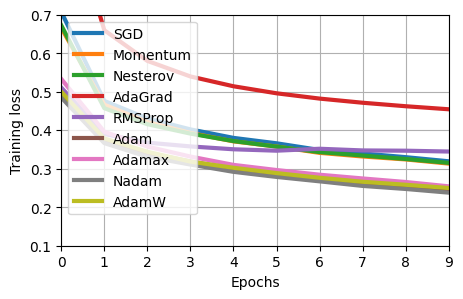

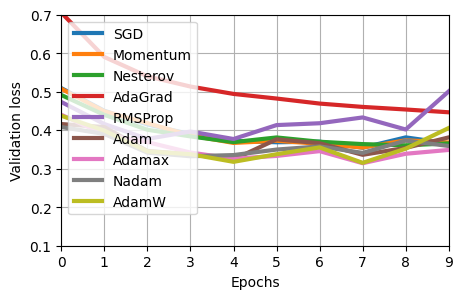

In [15]:
import matplotlib.pyplot as plt

# Define the loss metrics for visualization
loss_metrics = ["loss", "val_loss"]

# Iterate over the loss metrics for visualization
for loss_metric in loss_metrics:
    # Create a new figure for visualization
    plt.figure(figsize=(5, 3))

    # Define the names of the optimizers
    optimizer_names = ["SGD", "Momentum", "Nesterov", "AdaGrad", "RMSProp",
                       "Adam", "Adamax", "Nadam", "AdamW"]

    # Iterate over the histories of different optimizers and plot their learning curves
    for history, optimizer_name in zip((history_sgd, history_momentum, history_nesterov,
                                        history_adagrad, history_rmsprop, history_adam,
                                        history_adamax, history_nadam, history_adamw),
                                       optimizer_names):
        # Plot the learning curve for the current optimizer
        plt.plot(history.history[loss_metric], label=optimizer_name, linewidth=3)

    # Add gridlines to the plot
    plt.grid()

    # Set labels for the axes
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss_metric])

    # Add a legend to the plot
    plt.legend(loc="upper left")

    # Set the axis limits for better visualization
    plt.axis([0, 9, 0.1, 0.7])

    # Show the plot
    plt.show()
